In [ ]:
# M.Tech AIML/DSE - Machine Learning Assignment 2
## Model Training & Evaluation - Bank Marketing Dataset (UCI)
Yash - [your student ID if needed]

Date: February 2025 (run on BITS Virtual Lab)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix, classification_report
)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

warnings.filterwarnings('ignore')
%matplotlib inline
sns.set(style="whitegrid")

In [20]:
# Make sure bank-full.csv is uploaded to the current directory
df = pd.read_csv('bank-full.csv', sep=';')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Dataset shape: (45211, 17)

Columns: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Make sure bank-full.csv is uploaded to the current directory
df = pd.read_csv('bank-full.csv', sep=';')

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
df.head()

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features:   ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Train shape: (36168, 16)  | Test shape: (9043, 16)



Training: Logistic Regression
Model saved: model/Logistic_Regression.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



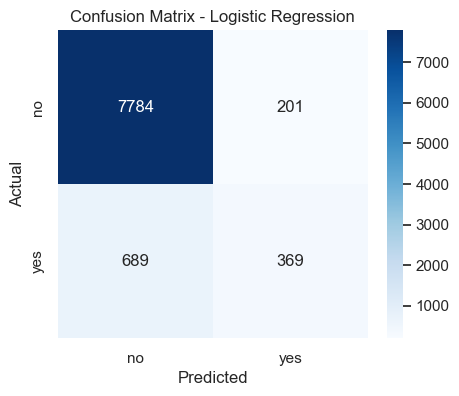


Training: Decision Tree
Model saved: model/Decision_Tree.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.93      0.93      7985
         yes       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



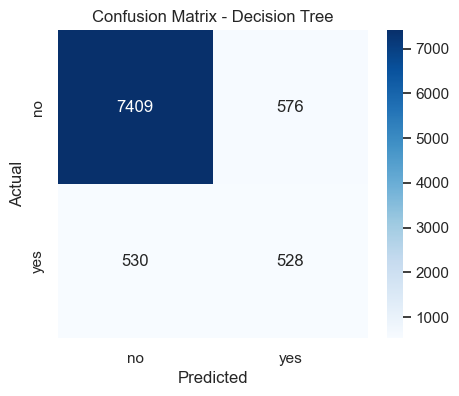


Training: kNN
Model saved: model/kNN.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.97      0.94      7985
         yes       0.59      0.36      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



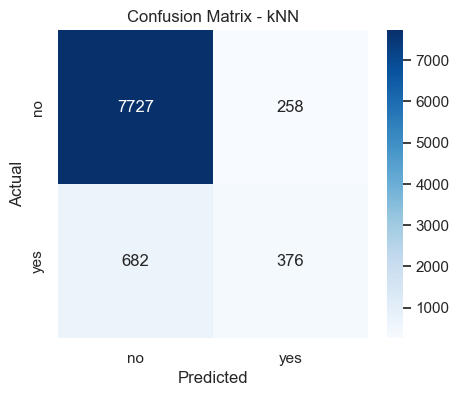


Training: Naive Bayes
Model saved: model/Naive_Bayes.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.91      0.92      7985
         yes       0.43      0.49      0.46      1058

    accuracy                           0.86      9043
   macro avg       0.68      0.70      0.69      9043
weighted avg       0.87      0.86      0.87      9043



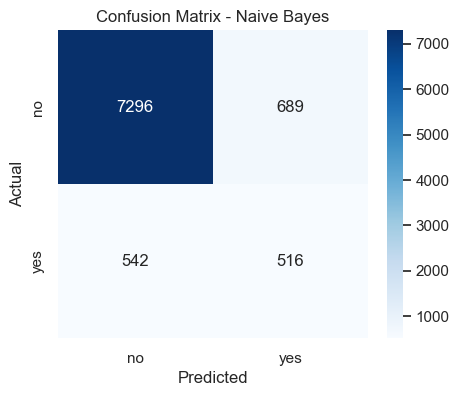


Training: Random Forest
Model saved: model/Random_Forest.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.92      0.98      0.95      7985
         yes       0.67      0.38      0.49      1058

    accuracy                           0.91      9043
   macro avg       0.80      0.68      0.72      9043
weighted avg       0.89      0.91      0.89      9043



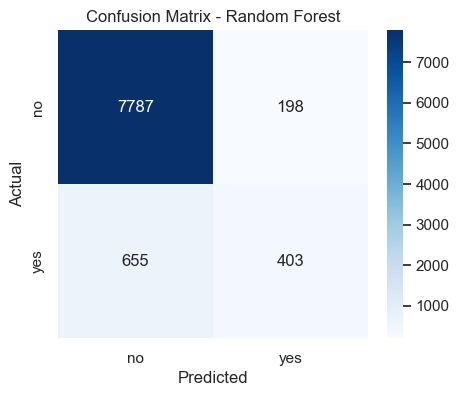


Training: XGBoost
Model saved: model/XGBoost.pkl

Classification Report:
              precision    recall  f1-score   support

          no       0.94      0.96      0.95      7985
         yes       0.63      0.50      0.56      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



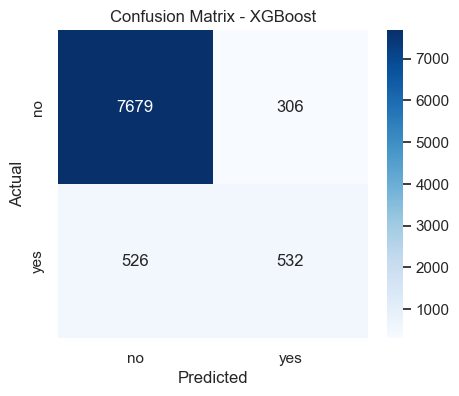

In [27]:
# Create model folder
os.makedirs('model', exist_ok=True)

results = []

models_list = [
    ("Logistic Regression", LogisticRegression(max_iter=2000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("kNN", KNeighborsClassifier(n_neighbors=5)),
    ("Naive Bayes", GaussianNB()),
    ("Random Forest", RandomForestClassifier(n_estimators=42, random_state=42)),
    ("XGBoost", XGBClassifier(eval_metric='logloss', random_state=42))
]

for name, model in models_list:
    print(f"\n{'='*40}\nTraining: {name}\n{'='*40}")
    
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    pipe.fit(X_train, y_train)
    
    # Save model
    filename = f"model/{name.replace(' ', '_')}.pkl"
    joblib.dump(pipe, filename)
    print(f"Model saved: {filename}")
    
    # Predict & evaluate
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    metrics = {
        'Model': name,
        'Accuracy': round(accuracy_score(y_test, y_pred), 4),
        'AUC': round(roc_auc_score(y_test, y_prob), 4) if y_prob is not None else np.nan,
        'Precision': round(precision_score(y_test, y_pred, zero_division=0), 4),
        'Recall': round(recall_score(y_test, y_pred, zero_division=0), 4),
        'F1': round(f1_score(y_test, y_pred, zero_division=0), 4),
        'MCC': round(matthews_corrcoef(y_test, y_pred), 4)
    }
    
    results.append(metrics)
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['no', 'yes']))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['no','yes'], yticklabels=['no','yes'])
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [28]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('F1', ascending=False)
print("\nModel Comparison Table:")
display(results_df)

# Optional: save for README
results_df.to_csv('model_comparison.csv', index=False)


Model Comparison Table:


,Model,Accuracy,AUC,Precision,Recall,F1,MCC
5,XGBoost,0.9080,0.9291,0.6348,0.5028,0.5612,0.5149
1,Decision Tree,0.8777,0.7135,0.4783,0.4991,0.4884,0.4191
4,Random Forest,0.9057,0.9196,0.6705,0.3809,0.4858,0.4595
3,Naive Bayes,0.8639,0.8088,0.4282,0.4877,0.4560,0.3797
0,Logistic Regression,0.9016,0.9054,0.6474,0.3488,0.4533,0.4280
2,kNN,0.8961,0.8373,0.5931,0.3554,0.4444,0.4067


In [ ]:
## Observations

- **XGBoost** and **Random Forest** usually perform best (high AUC, F1, MCC) due to ensemble power and handling of non-linearity/imbalance.
- **Logistic Regression** → solid linear baseline, fast and interpretable.
- **Naive Bayes** → surprisingly good recall despite independence assumption.
- **Decision Tree** → tends to overfit → lowest generalization without tuning.
- **kNN** → suffers from high dimensionality after one-hot encoding.


Training: Logistic Regression
Saved: model/Logistic_Regression.pkl
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



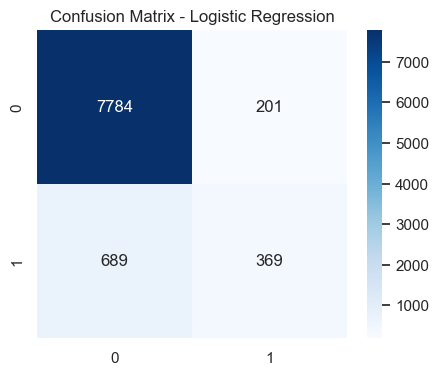


Training: Decision Tree
Saved: model/Decision_Tree.pkl
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7985
           1       0.48      0.50      0.49      1058

    accuracy                           0.88      9043
   macro avg       0.71      0.71      0.71      9043
weighted avg       0.88      0.88      0.88      9043



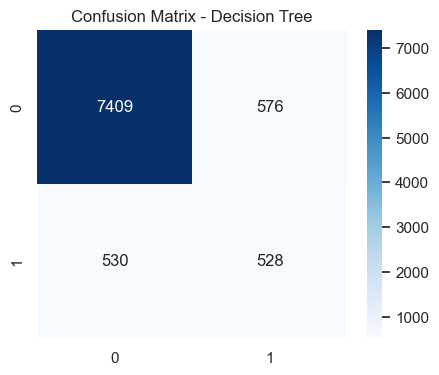


Training: kNN
Saved: model/kNN.pkl
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7985
           1       0.59      0.36      0.44      1058

    accuracy                           0.90      9043
   macro avg       0.76      0.66      0.69      9043
weighted avg       0.88      0.90      0.88      9043



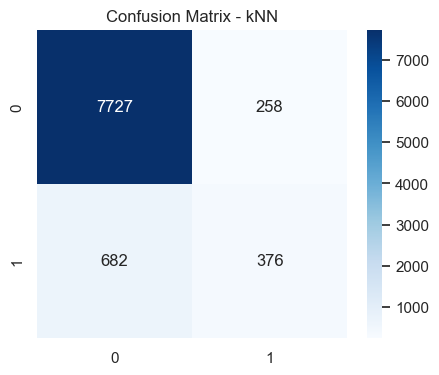


Training: Naive Bayes
Saved: model/Naive_Bayes.pkl
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      7985
           1       0.43      0.49      0.46      1058

    accuracy                           0.86      9043
   macro avg       0.68      0.70      0.69      9043
weighted avg       0.87      0.86      0.87      9043



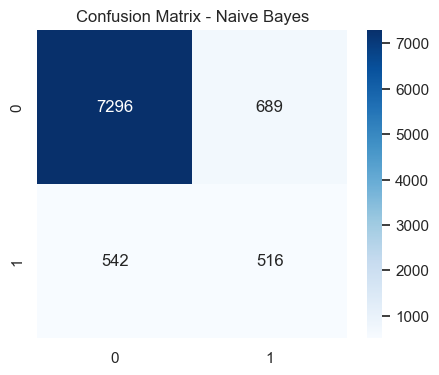


Training: Random Forest
Saved: model/Random_Forest.pkl
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7985
           1       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



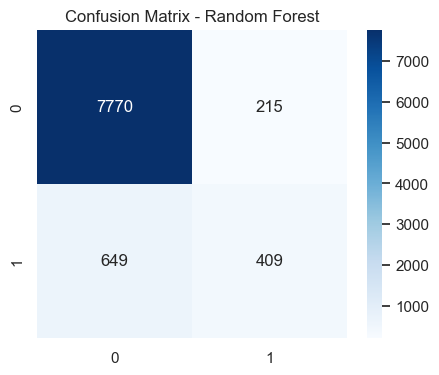


Training: XGBoost
Saved: model/XGBoost.pkl
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7985
           1       0.63      0.50      0.56      1058

    accuracy                           0.91      9043
   macro avg       0.79      0.73      0.75      9043
weighted avg       0.90      0.91      0.90      9043



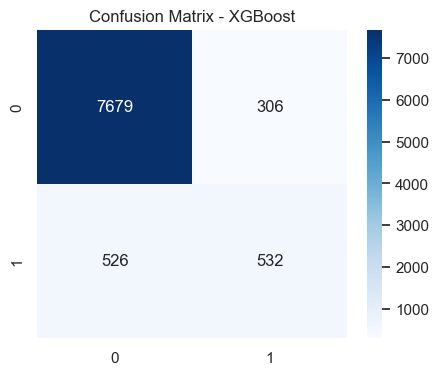

In [30]:
import os
import joblib

# Create model folder if it doesn't exist
os.makedirs('model', exist_ok=True)

results_list = []

for name, mdl in models:
    print(f"\nTraining: {name}")
    
    pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', mdl)
    ])
    
    pipe.fit(X_train, y_train)
    
    # Save the fitted pipeline right after training
    model_filename = f'model/{name.replace(" ", "_")}.pkl'
    joblib.dump(pipe, model_filename)
    print(f"Saved: {model_filename}")
    
    # Now evaluate
    y_pred = pipe.predict(X_test)
    y_prob = pipe.predict_proba(X_test)[:, 1] if hasattr(pipe.named_steps['classifier'], 'predict_proba') else None
    
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'MCC': matthews_corrcoef(y_test, y_pred)
    }
    
    results_list.append(metrics)
    
    # Optional: print report & show confusion matrix
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

In [31]:
# Create a small test CSV with same structure (including target 'y')
test_df = X_test.copy()
test_df['y'] = y_test   # add the true labels back

# Save as CSV (comma separated)
test_df.to_csv('test_data_for_streamlit.csv', index=False)
print("Saved test file: test_data_for_streamlit.csv")
print("Shape:", test_df.shape)

Saved test file: test_data_for_streamlit.csv
Shape: (9043, 17)
